# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("WineQT.csv")
df = df.iloc[:, :-1]
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


summary for wine dataset

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


group by quality and take mean value for each attribute

In [32]:
col_names = list(df.columns)
df_group = df.groupby("quality").mean()
#df_group = df_group.reset_index()
df_group


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


[]

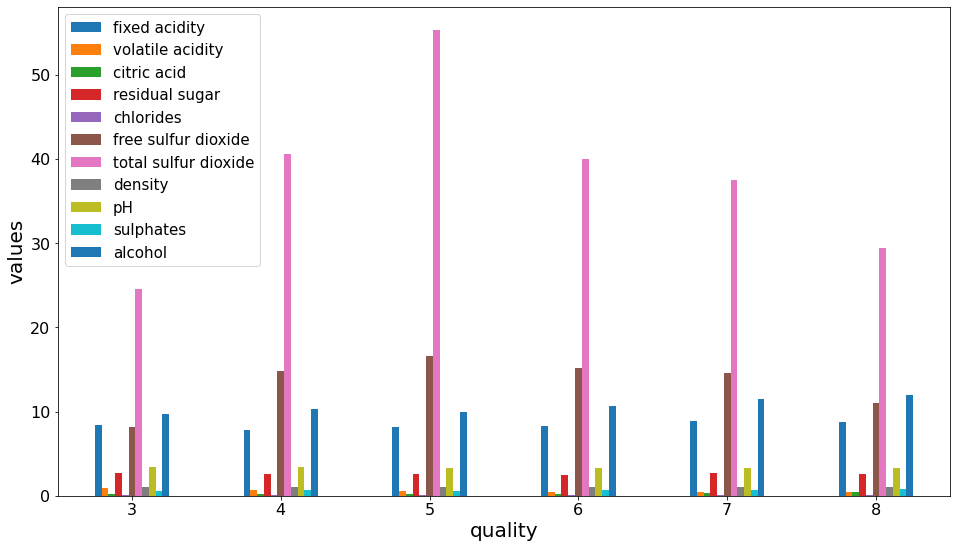

In [42]:

df_group.plot(kind='bar', figsize=(16, 9), rot=0, fontsize=16)
plt.xlabel("quality", size = 20)
plt.ylabel("values", size = 20)
plt.legend(fontsize=15)
plt.plot()

# Data mining - Correlation
Project proposal requirement: 
1. find correlation
2. find the feature that has strong correlation to quality

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


**Positive correlation: alcohol** 

**Inverse correlation: volatile acidity**

**low correlation: residual sugar, free sulfur dioxide, pH**

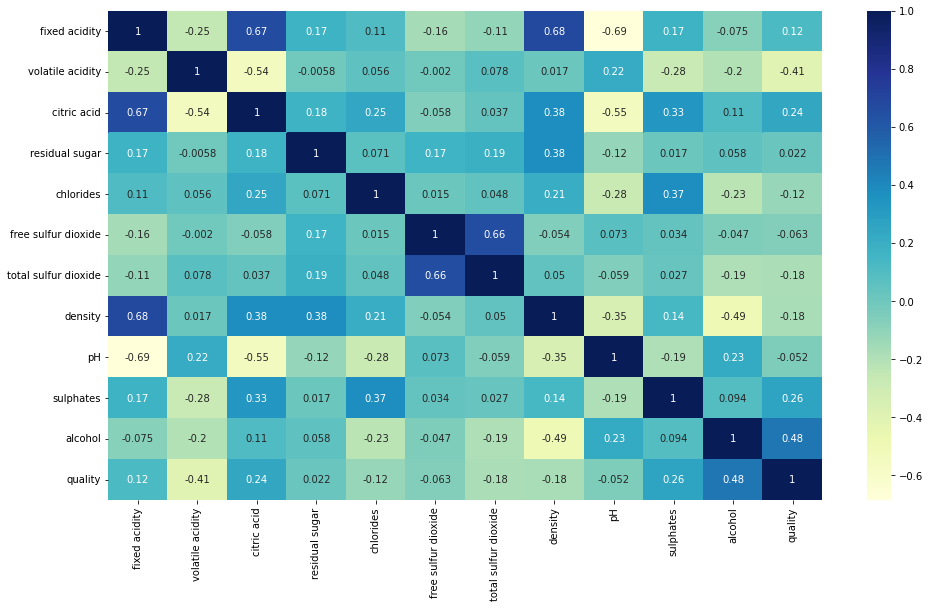

In [ ]:
plt.figure(figsize=(16, 9))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


**Positive correlation: alcohol** 

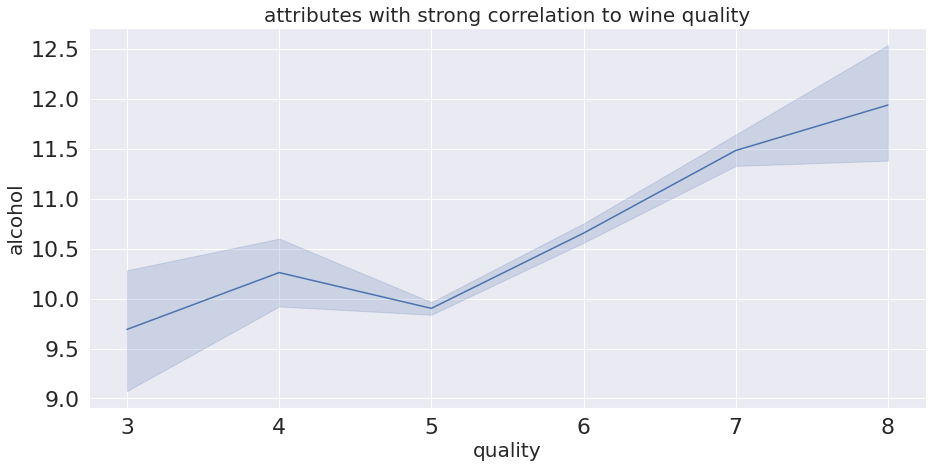

In [54]:
plt.figure(figsize=(15,7))

sb.lineplot(data=df, x="quality",y="alcohol")

sb.set(font_scale=2)
plt.xlabel("quality", fontsize=20)
plt.ylabel("alcohol", fontsize=20)
plt.title("attributes with strong correlation to wine quality", fontsize=20)
plt.show()

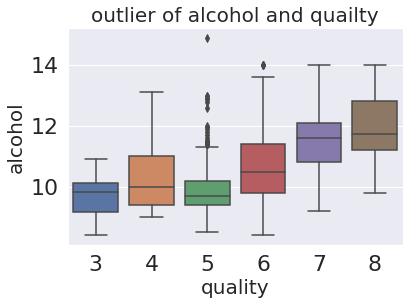

In [59]:
sb.boxplot(x=df.quality,y=df['alcohol'])
sb.set(font_scale=2)
plt.xlabel("quality", fontsize=20)
plt.ylabel("alcohol", fontsize=20)
plt.title("outlier of alcohol and quailty", fontsize=20)
plt.show()

**Inverse correlation: volatile acidity**



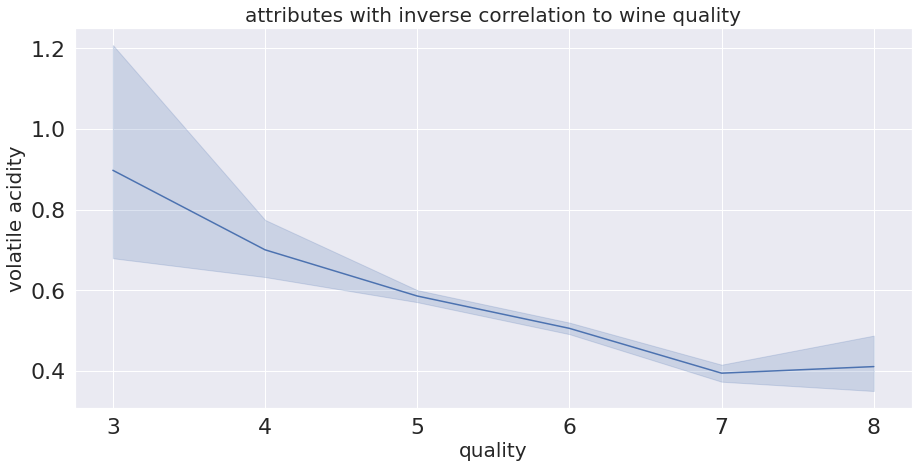

In [56]:
plt.figure(figsize=(15,7))
sb.lineplot(data=df, x="quality",y="volatile acidity")
plt.title("attributes with inverse correlation to wine quality")
sb.set(font_scale=2)
plt.xlabel("quality", fontsize=20)
plt.ylabel("volatile acidity", fontsize=20)
plt.title("attributes with inverse correlation to wine quality", fontsize=20)
plt.show()

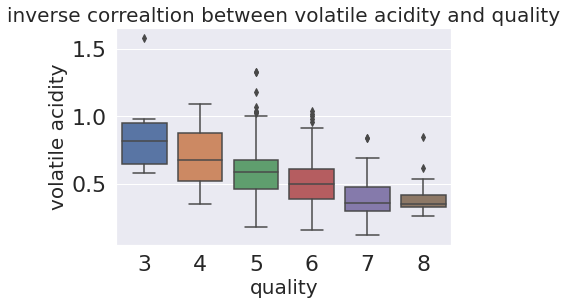

In [60]:
sb.boxplot(x=df.quality,y=df['volatile acidity'])
sb.set(font_scale=2)
plt.xlabel("quality", fontsize=20)
plt.ylabel("volatile acidity", fontsize=20)
plt.title("inverse correaltion between volatile acidity and quality", fontsize=20)
plt.show()

**low correlation: residual sugar, free sulfur dioxide, pH**

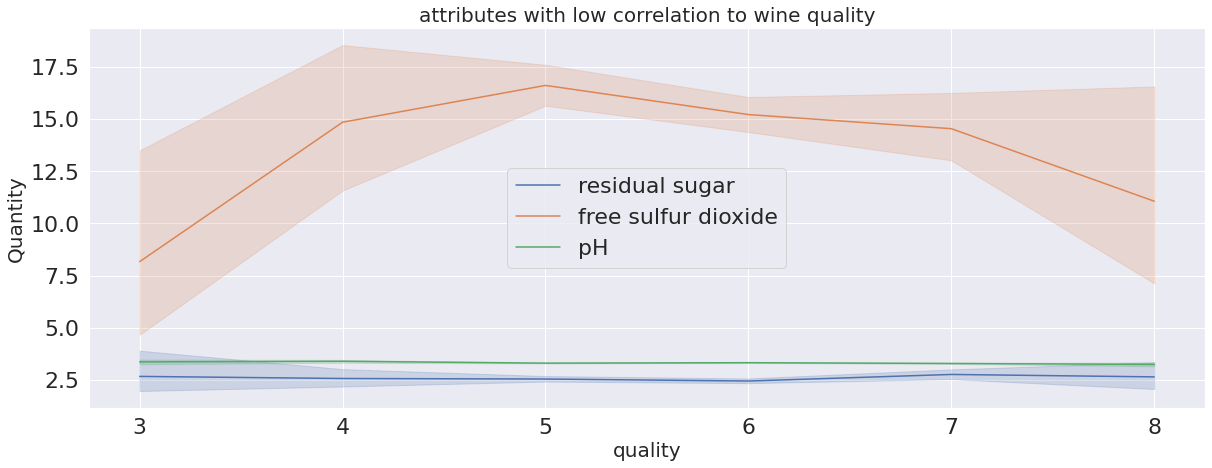

In [53]:
plt.figure(figsize=(20,7))
sb.lineplot(data=df, x="quality",y="residual sugar", label="residual sugar")
sb.lineplot(data=df, x="quality",y="free sulfur dioxide", label="free sulfur dioxide")
sb.lineplot(data=df, x="quality",y="pH", label="pH")
plt.ylabel("Quantity", fontsize=20)
plt.title("attributes with low correlation to wine quality", fontsize=20)
plt.legend()
sb.set(font_scale=2)
plt.xlabel("quality", fontsize=20)
plt.plot()
plt.show()

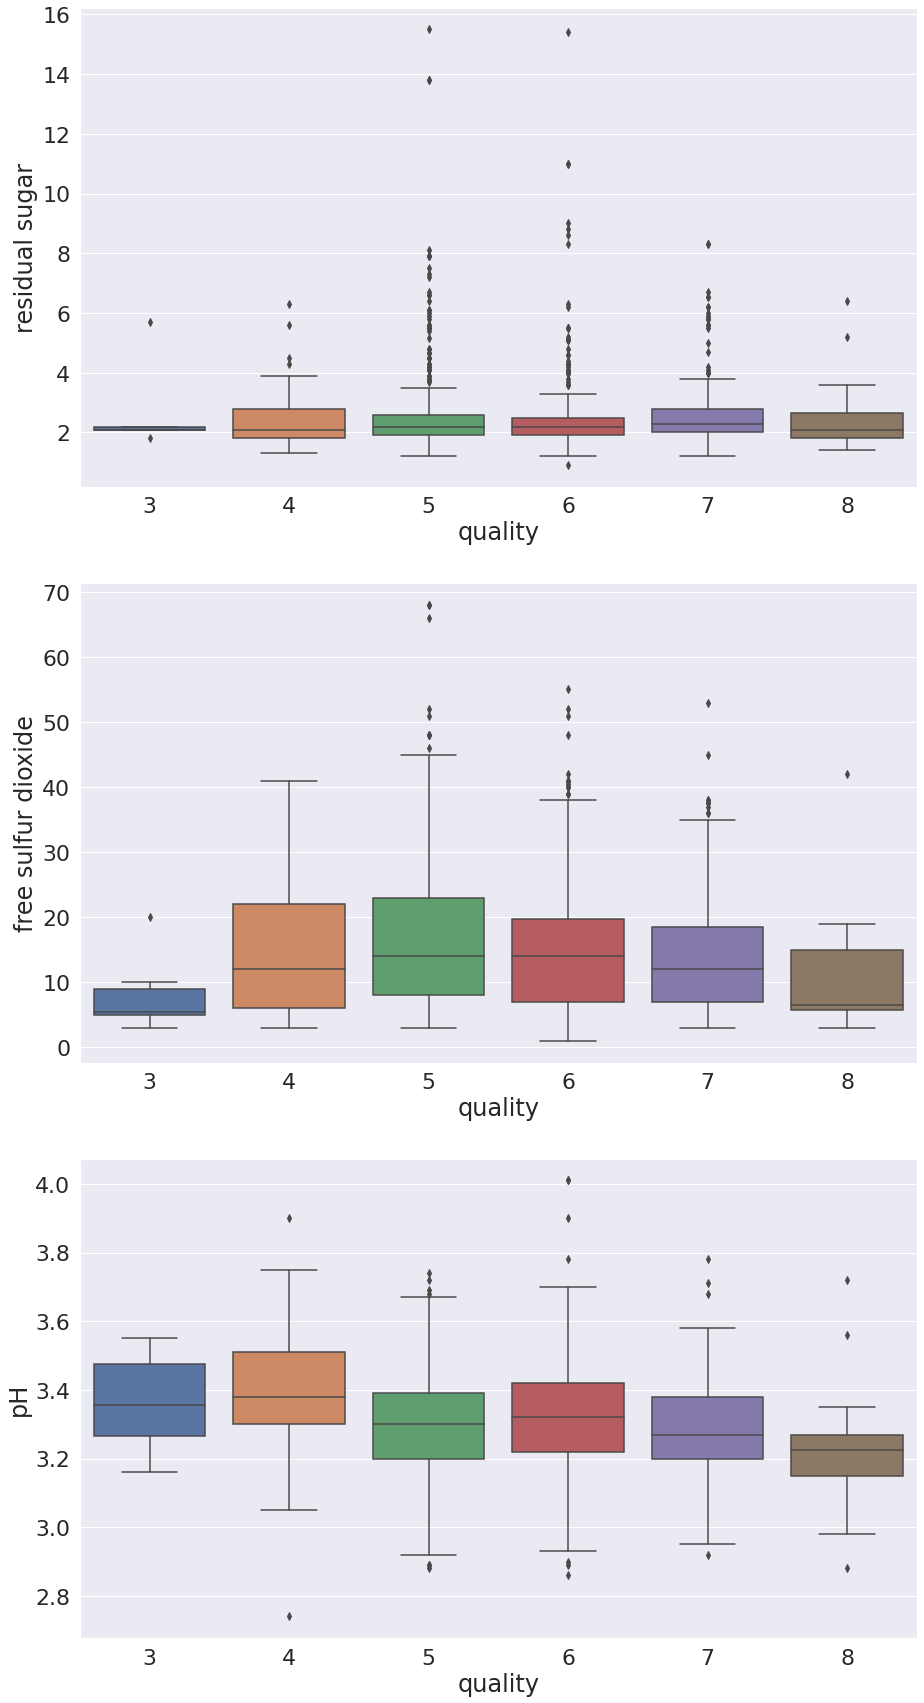

In [58]:
fig,ax=plt.subplots(3,1,figsize=(15,30))
sb.boxplot(x=df.quality,y=df['residual sugar'],ax=ax[0])
sb.boxplot(x=df.quality,y=df['free sulfur dioxide'],ax=ax[1])
sb.boxplot(x=df.quality,y=df['pH'],ax=ax[2])
sb.set(font_scale=2)

**TBD -- need to find outlier**

Project proposal requirement: find outlier


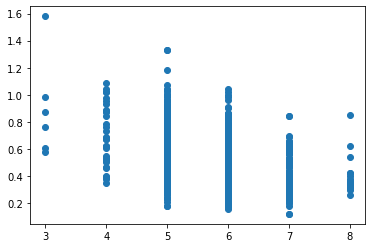

In [ ]:
plt.scatter(df['quality'], df['volatile acidity'])


# training
project requirements: training classification model

In [61]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(x.shape)
print(y.shape)

(1143, 11)
(1143,)


In [62]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=.8, random_state=3)

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

4 classification algorithms are been used.
1. SVC
2. Random Forester
3. Decision Tree
4. KNN

In [64]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

**TBD -- still need to tune the parameters for each training model to achieve better accuracy**

In [ ]:
# models=[]
# models.append(('rbf SVM', SVC(kernel='rbf', random_state=0)))
# models.append(('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)))
# models.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=10, metric='euclidean', p=2)))

In [ ]:
# classifier = []
# for i in range(len(models)):
#   print("training {0} model...".format(models[i][0]))
#   classifier.append(models[i][1])
#   classifier[i].fit(train_x, train_y)

# print("Done!")

**TBD -- still more evaluation metrics to compare result**
1. K-fold
2. confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score

# accuracy = []

# for i in range(len(models)):
#   pred_y = classifier[i].predict(test_x)
#   cm = confusion_matrix(test_y, pred_y)
#   accuracy.append(accuracy_score(test_y, pred_y))
#   print("----------model {0}----------".format(models[i][0]))
#   #print("confusion matrix")
#   #print(cm)
#   print("accuracy score {0}\n".format(accuracy[i]))
#   #print("report")
#   #print(classification_report(test_y, pred_y))

# print(models[accuracy.index(max(accuracy))][0], "is the best")

## Hyperparameter tuning with Cross Validation ##

1.   List item
2.   List item



In [65]:
from sklearn.model_selection import GridSearchCV, cross_val_score

def train_tune_hyperparameter_with_cross_validation(estimator, param_grid, X_train, X_test, y_train, y_test):

    # Training and performing cross validation with default parameters
    default_scores = cross_val_score(estimator, X_train, y_train, cv=5)

    # Perfoming Hyperparameter tuning for each k fold by training with each hyperparmeter value
    grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5)
    grid.fit(X_train, y_train)

    # Outputs to table
    default_validation_accuracy = default_scores.mean()
    tuned_validation_accuracy = grid.best_score_
    selected_hyperparameters = grid.best_params_
    
    return (default_validation_accuracy, tuned_validation_accuracy, selected_hyperparameters, grid.best_estimator_)

In [66]:
svm_default_validation_accuracy, svm_tuned_validation_accuracy, svm_selected_hyperparameters, svm_best_estimator = \
            train_tune_hyperparameter_with_cross_validation(SVC(kernel='rbf'), {'gamma': np.logspace(-5, 5, 11), 'C': np.logspace(-5, 5, 11) }, train_x, test_x, train_y, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


In [67]:
rf_default_validation_accuracy, rf_tuned_validation_accuracy, rf_selected_hyperparameters, rf_best_estimator = \
            train_tune_hyperparameter_with_cross_validation(RandomForestClassifier(), {'n_estimators':[10, 25, 50, 75, 100], 'min_samples_split': [3, 5, 7, 9]},train_x, test_x, train_y, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


In [68]:
tree_default_validation_accuracy, tree_tuned_validation_accuracy, tree_selected_hyperparameters, tree_best_estimator = \
            train_tune_hyperparameter_with_cross_validation(DecisionTreeClassifier(), {'min_samples_split': [3, 5, 7, 9]},train_x, test_x, train_y, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


In [69]:
knn_default_validation_accuracy, knn_tuned_validation_accuracy, knn_selected_hyperparameters, _best_estimator = \
            train_tune_hyperparameter_with_cross_validation(KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9]},train_x, test_x, train_y, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


In [70]:
df_ml = pd.DataFrame(
    {'Model':                        ['SVM'                          , 'k-NN'                         , 'Decision Trees'                , 'Random Forest'],
     'Default validation accuracy':  [svm_default_validation_accuracy, knn_default_validation_accuracy, tree_default_validation_accuracy, rf_default_validation_accuracy], 
     'Tuned validation accuracy':    [svm_tuned_validation_accuracy  , knn_tuned_validation_accuracy  , tree_tuned_validation_accuracy  , rf_tuned_validation_accuracy], 
     'Selected hyperparameters':     [svm_selected_hyperparameters   , knn_selected_hyperparameters   , tree_selected_hyperparameters   , rf_selected_hyperparameters]
    })
df_ml

,Model,Default validation accuracy,Tuned validation accuracy,Selected hyperparameters
0,SVM,0.607242,0.631298,"{'C': 1.0, 'gamma': 1.0}"
1,k-NN,0.585324,0.587462,{'n_neighbors': 1}
2,Decision Trees,0.543776,0.551426,{'min_samples_split': 3}
3,Random Forest,0.663022,0.669591,"{'min_samples_split': 3, 'n_estimators': 75}"


**Best model is found to be Random Forest after hyperparameter tuning and cross validation**

## Confusion Matrix##

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1440x504 with 0 Axes>

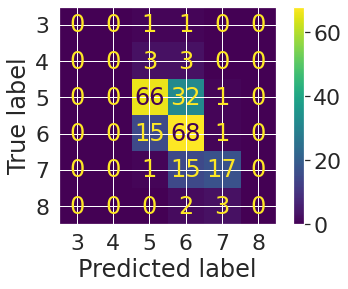

In [72]:
from sklearn import metrics
plt.figure(figsize=(20,7))
metrics.plot_confusion_matrix(rf_best_estimator, test_x, test_y)